# Structured Data Assessment

# Description of the Dataset

The dataset in question contains a comprehensive collection of electronic health records belonging to patients who have been diagnosed with a specificdisease. These health records comprise a detailed log of every aspect of the patients' medical history, including all diagnoses, symptoms, prescribed drugtreatments, and medical tests that they have undergone. Each row represents a healthcare record/medical event for a patient and it includes a timestamp for eachentry/event, thereby allowing for a chronological view of the patient's medical history.

The Data has mainly three columns are:
    1. Patient-Uid - Unique Alphanumeric Identifier for a patient
    2. Date - Date when patient encountered the event.
    3. Incident - This columns describes which event occurred on the day.

# Problem Statement

The development of drugs is critical in providing therapeutic options
for patients suffering from chronic and terminal illnesses. “Target Drug”, in particular,
is designed to enhance the patient's health and well-being without causing
dependence on other medications that could potentially lead to severe and
life-threatening side effects. These drugs are specifically tailored to treat a particular
disease or condition, offering a more focused and effective approach to treatment,
while minimising the risk of harmful reactions.
The objective in this assignment is to develop a predictive model which will predict
whether a patient will be eligible*** for “Target Drug” or not in next 30 days. Knowing
if the patient is eligible or not will help physician treating the patient make informed
decision on the which treatments to give.

# Import Necessary Packages

In [1]:
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings("ignore") #To avoid general warnings
pd.set_option("display.max_columns",None) # To display all the columns

# Load the File

In [3]:
df = pd.read_parquet('train.parquet')
df.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


# Duplicates?

In [4]:
df.duplicated().sum()

35571

In [5]:
df.drop_duplicates(inplace=True) #remove duplicates

In [6]:
df.reset_index(inplace=True)

In [7]:
df.drop(columns='index',inplace=True,axis=1)
df.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [8]:
df.columns = df.columns.str.lower() #change all the columns into lowercase
df.head()

,patient-uid,date,incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [9]:
td_positive_df = df[df['incident']=='TARGET DRUG']
td_positive_df.head()

,patient-uid,date,incident
2065342,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG
2065362,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG
2065502,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG
2065613,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG
2065618,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG


In [10]:
#deduct rows of df which is there in positive_df
td_negative = df[~df['patient-uid'].isin(td_positive_df['patient-uid'])]
#only take last incident of all patients
td_negative_df = td_negative.groupby('patient-uid').tail(1)
td_negative_df

,patient-uid,date,incident
846032,a0e3a8c0-1c7c-11ec-98c2-16262ee38c7f,2018-05-06,PRIMARY_DIAGNOSIS
878620,a0dd6a3f-1c7c-11ec-9b86-16262ee38c7f,2015-04-07,SYMPTOM_TYPE_0
882928,a0e48a75-1c7c-11ec-8c5f-16262ee38c7f,2018-08-22,DRUG_TYPE_6
1053885,a0e3cf61-1c7c-11ec-8098-16262ee38c7f,2018-08-21,DRUG_TYPE_2
1071734,a0e91a8c-1c7c-11ec-acc2-16262ee38c7f,2020-04-15,PRIMARY_DIAGNOSIS
...,...,...,...
1763696,a0e045a1-1c7c-11ec-8014-16262ee38c7f,2020-07-10,PRIMARY_DIAGNOSIS
1763697,a0e67e2a-1c7c-11ec-b805-16262ee38c7f,2015-12-16,PRIMARY_DIAGNOSIS
1763698,a0dec400-1c7c-11ec-80df-16262ee38c7f,2019-08-06,PRIMARY_DIAGNOSIS
1763699,a0e09919-1c7c-11ec-9e7d-16262ee38c7f,2017-02-19,DRUG_TYPE_6


In [11]:
#To get the prev prescription took by patients with time interval
td_positive_df['prescription_count'] = td_positive_df.groupby('patient-uid')['date'].cumcount()
td_negative_df['prescription_count'] = td_negative_df.groupby('patient-uid')['date'].cumcount()

In [12]:
td_positive_df.tail(7)

,patient-uid,date,incident,prescription_count
3185215,a0ef2676-1c7c-11ec-827b-16262ee38c7f,2019-06-12,TARGET DRUG,16
3185216,a0ebc15d-1c7c-11ec-88d2-16262ee38c7f,2019-11-14,TARGET DRUG,9
3185222,a0ef2b6d-1c7c-11ec-9172-16262ee38c7f,2018-10-12,TARGET DRUG,4
3185233,a0ebe423-1c7c-11ec-a5e0-16262ee38c7f,2019-07-02,TARGET DRUG,9
3185247,a0ebc713-1c7c-11ec-bd53-16262ee38c7f,2019-05-21,TARGET DRUG,10
3185273,a0ee1bdb-1c7c-11ec-90ba-16262ee38c7f,2018-06-07,TARGET DRUG,14
3185282,a0eef180-1c7c-11ec-8de8-16262ee38c7f,2018-07-17,TARGET DRUG,13


In [13]:
td_negative_df.tail(6)

,patient-uid,date,incident,prescription_count
1763695,a0dfbefd-1c7c-11ec-9b98-16262ee38c7f,2020-05-27,PRIMARY_DIAGNOSIS,0
1763696,a0e045a1-1c7c-11ec-8014-16262ee38c7f,2020-07-10,PRIMARY_DIAGNOSIS,0
1763697,a0e67e2a-1c7c-11ec-b805-16262ee38c7f,2015-12-16,PRIMARY_DIAGNOSIS,0
1763698,a0dec400-1c7c-11ec-80df-16262ee38c7f,2019-08-06,PRIMARY_DIAGNOSIS,0
1763699,a0e09919-1c7c-11ec-9e7d-16262ee38c7f,2017-02-19,DRUG_TYPE_6,0
1763700,a0e69331-1c7c-11ec-a98d-16262ee38c7f,2015-10-03,DRUG_TYPE_6,0


In [14]:
# calculate the time_interval in days between 30 days from the current date and the maximum date for each patient in two different DataFrames
pred_date = pd.to_datetime('today') + pd.DateOffset(days=30)
td_positive_df['time_interval'] = (pred_date - td_positive_df.groupby('patient-uid')['date'].transform('max')).dt.days
td_negative_df['time_interval'] = (pred_date - td_negative_df.groupby('patient-uid')['date'].transform('max')).dt.days

In [15]:
td_negative_df.tail()

,patient-uid,date,incident,prescription_count,time_interval
1763696,a0e045a1-1c7c-11ec-8014-16262ee38c7f,2020-07-10,PRIMARY_DIAGNOSIS,0,1231
1763697,a0e67e2a-1c7c-11ec-b805-16262ee38c7f,2015-12-16,PRIMARY_DIAGNOSIS,0,2899
1763698,a0dec400-1c7c-11ec-80df-16262ee38c7f,2019-08-06,PRIMARY_DIAGNOSIS,0,1570
1763699,a0e09919-1c7c-11ec-9e7d-16262ee38c7f,2017-02-19,DRUG_TYPE_6,0,2468
1763700,a0e69331-1c7c-11ec-a98d-16262ee38c7f,2015-10-03,DRUG_TYPE_6,0,2973


In [16]:
td_positive_df.tail()

,patient-uid,date,incident,prescription_count,time_interval
3185222,a0ef2b6d-1c7c-11ec-9172-16262ee38c7f,2018-10-12,TARGET DRUG,4,1717
3185233,a0ebe423-1c7c-11ec-a5e0-16262ee38c7f,2019-07-02,TARGET DRUG,9,1213
3185247,a0ebc713-1c7c-11ec-bd53-16262ee38c7f,2019-05-21,TARGET DRUG,10,1190
3185273,a0ee1bdb-1c7c-11ec-90ba-16262ee38c7f,2018-06-07,TARGET DRUG,14,1197
3185282,a0eef180-1c7c-11ec-8de8-16262ee38c7f,2018-07-17,TARGET DRUG,13,1388


In [17]:
Df = pd.concat([td_positive_df,td_negative_df])
Df.head()

,patient-uid,date,incident,prescription_count,time_interval
2065342,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG,0,1197
2065362,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG,0,1451
2065502,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG,0,1476
2065613,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG,0,1181
2065618,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG,0,1197


# Split the data into Train and Test

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [19]:
X_train,X_test,y_train,y_test = train_test_split(Df[['prescription_count', 'time_interval']], Df['incident'] == 'TARGET DRUG', test_size = 0.25, random_state=50)

In [20]:
X_train.head()

,prescription_count,time_interval
2490278,2,1226
2598532,7,1199
1759524,0,1897
2926426,8,1225
2882364,9,1199


# Machine Learning Models

In [21]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, roc_auc_score as r_a_s,roc_curve,auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf_classifier=RandomForestClassifier(random_state=50)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

In [24]:
prediction_y = rf_classifier.predict(X_test)

In [25]:
F1_rf = f1_score(y_test,prediction_y)
print(F1_rf)

0.9596326420360757


In [26]:
max_depth=np.array([2,4,8,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth:
    rf_classifier=RandomForestClassifier(max_depth=d, random_state=0)
    rf_classifier.fit(X_train,y_train)
    print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_classifier,X_train,y_train,cv = 15).mean())
    cross_val_rf.append(cross_val_score(rf_classifier,X_train,y_train,cv = 15).mean())

Depth :  2 cross_val_score :  0.9408077535108185
Depth :  4 cross_val_score :  0.9408077609152262
Depth :  8 cross_val_score :  0.9415460877367531
Depth :  10 cross_val_score :  0.9422687135115412
Depth :  11 cross_val_score :  0.9422844478781153
Depth :  12 cross_val_score :  0.9422530346780255
Depth :  13 cross_val_score :  0.9421116512132975
Depth :  15 cross_val_score :  0.9425357905008706
Depth :  18 cross_val_score :  0.9414832835497975
Depth :  20 cross_val_score :  0.9409962623289868


In [27]:
r_a_s_rf = r_a_s(y_test,prediction_y)
r_a_s_rf

0.9100801435406698

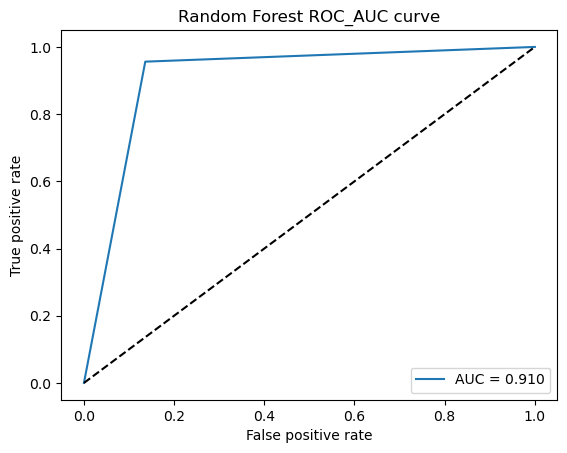

Random Forest roc_auc Score: 0.9100801435406698


In [28]:
#roc_auc curve

fpr,tpr, thresold = roc_curve(y_test, prediction_y)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr, label = 'AUC = %0.3f' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.title('Random Forest ROC_AUC curve')
plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


r_a_s_rf = r_a_s(y_test, prediction_y)
print("Random Forest roc_auc Score:", r_a_s_rf)

In [29]:
print('F1 score of Random Forest Classifier is : ',F1_rf)
print('roc_auc_score of Random Forest Classifier is : ',r_a_s_rf)
print('The best depth is 15 and the Cross_Val_Score is: ', max(cross_val_rf))

F1 score of Random Forest Classifier is :  0.9596326420360757
roc_auc_score of Random Forest Classifier is :  0.9100801435406698
The best depth is 15 and the Cross_Val_Score is:  0.9425357905008706


# Extreme Gradiant Boosting Classification

In [30]:
xgb_classifier =XGBClassifier(random_state = 56)
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=56, ...)

In [31]:
prediction_y_ = xgb_classifier.predict(X_test)

In [32]:
F1_xg = f1_score(y_test,prediction_y_)

In [33]:
r_a_s_xg = r_a_s(y_test,prediction_y_)
r_a_s_xg

0.9301330409356725

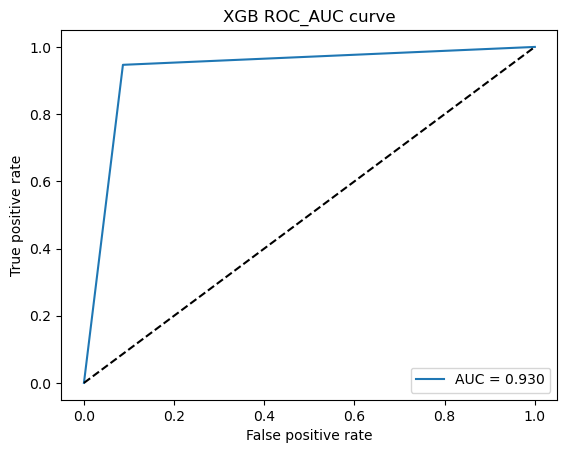

XG Boost roc_auc Score: 0.9301330409356725


In [34]:
#roc_auc curve

fpr,tpr, thresold = roc_curve(y_test, prediction_y_)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr, label = 'AUC = %0.3f' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.title('XGB ROC_AUC curve')
plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


r_a_s_xg = r_a_s(y_test, prediction_y_)
print("XG Boost roc_auc Score:", r_a_s_xg)

In [35]:
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
    xgb_classifier = XGBClassifier(learning_rate = lr,n_estimators=100)
    xgb_classifier.fit(X_train,y_train)
    print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_classifier,X_train,y_train,cv = 15).mean())
    cross_val_xgb.append(cross_val_score(xgb_classifier,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.9336285692855242
Learning rate :  0.05 cross_val_score: 0.9409805612822482
Learning rate :  0.08 cross_val_score: 0.9410119670779298
Learning rate :  0.1 cross_val_score: 0.9410904982270516
Learning rate :  0.2 cross_val_score: 0.9414675565876315
Learning rate :  0.25 cross_val_score: 0.9414204164253756
Learning rate :  0.3 cross_val_score: 0.9413732910719355


In [36]:
cross_val_xgb_classifier=max(cross_val_xgb)
print("The best Learning rate is 0.2 and Cross_val_score is:",cross_val_xgb_classifier)

The best Learning rate is 0.2 and Cross_val_score is: 0.9414675565876315


In [37]:
print('F1 score of XG Boost classifier is : ',F1_xg)
print('roc_auc_score of XG Boost classifier is : ',r_a_s_xg)

F1 score of XG Boost classifier is :  0.9611391098427348
roc_auc_score of XG Boost classifier is :  0.9301330409356725


# F1 Score 

In [38]:
print('The F1 score of Random Forest Classifier is: ',F1_rf)
print('The F1 score of XG Boost classifier is: ',F1_xg)

The F1 score of Random Forest Classifier is:  0.9596326420360757
The F1 score of XG Boost classifier is:  0.9611391098427348


# roc_auc_score

In [39]:
print('roc_auc_score of Random Forest Classifier is: ',r_a_s_rf)
print('roc_auc_score of XG Boost classifier is: ',r_a_s_xg)


roc_auc_score of Random Forest Classifier is:  0.9100801435406698
roc_auc_score of XG Boost classifier is:  0.9301330409356725


# Test_File

In [40]:
df_ = pd.read_parquet('test.parquet')
df_

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0
...,...,...,...
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8


# Duplicated?

In [41]:
df_.duplicated().sum()

12100

In [42]:
df_.drop_duplicates(inplace=True)

In [43]:
df_.columns = df.columns.str.lower()
df_.head(6)

,patient-uid,date,incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0
6,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-05-09,PRIMARY_DIAGNOSIS


In [44]:
td_positive_df = df_[df_['incident']=='TARGET DRUG']
td_positive_df.head()

,patient-uid,date,incident


In [45]:
td_negative = df_[~df_['patient-uid'].isin(td_positive_df['patient-uid'])]
td_negative_df = td_negative.groupby('patient-uid').tail(1)
td_negative_df

,patient-uid,date,incident
57,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,TEST_TYPE_0
208,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2016-06-22,DRUG_TYPE_9
305,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,2019-07-21,DRUG_TYPE_6
420,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2016-06-15,DRUG_TYPE_6
497,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,2018-11-22,DRUG_TYPE_6
...,...,...,...
1372381,a102720c-1c7c-11ec-bd9a-16262ee38c7f,2020-01-07,DRUG_TYPE_6
1372432,a102723c-1c7c-11ec-9f80-16262ee38c7f,2019-07-06,DRUG_TYPE_3
1372543,a102726b-1c7c-11ec-bfbf-16262ee38c7f,2018-12-31,DRUG_TYPE_0
1372607,a102729b-1c7c-11ec-86ba-16262ee38c7f,2019-04-02,DRUG_TYPE_3


In [46]:
#To get the prev prescription took by patients with time interval
td_positive_df['prescription_count'] = td_positive_df.groupby('patient-uid')['date'].cumcount()
td_negative_df['prescription_count'] = td_negative_df.groupby('patient-uid')['date'].cumcount()

In [47]:
#calculate the time_interval in days between 30 days from the current date and the maximum date for each patient in two different DataFrames
pred_date = pd.to_datetime('today') + pd.DateOffset(days=30)
td_positive_df['time_interval'] = (pred_date - td_positive_df.groupby('patient-uid')['date'].transform('max')).dt.days
td_negative_df['time_interval'] = (pred_date - td_negative_df.groupby('patient-uid')['date'].transform('max')).dt.days

In [48]:
td_negative_df.head()

,patient-uid,date,incident,prescription_count,time_interval
57,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,TEST_TYPE_0,0,2183
208,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2016-06-22,DRUG_TYPE_9,0,2710
305,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,2019-07-21,DRUG_TYPE_6,0,1586
420,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2016-06-15,DRUG_TYPE_6,0,2717
497,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,2018-11-22,DRUG_TYPE_6,0,1827


In [49]:
Df_ = pd.concat([td_positive_df,td_negative_df])
Df_

,patient-uid,date,incident,prescription_count,time_interval
57,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,TEST_TYPE_0,0,2183
208,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2016-06-22,DRUG_TYPE_9,0,2710
305,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,2019-07-21,DRUG_TYPE_6,0,1586
420,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2016-06-15,DRUG_TYPE_6,0,2717
497,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,2018-11-22,DRUG_TYPE_6,0,1827
...,...,...,...,...,...
1372381,a102720c-1c7c-11ec-bd9a-16262ee38c7f,2020-01-07,DRUG_TYPE_6,0,1416
1372432,a102723c-1c7c-11ec-9f80-16262ee38c7f,2019-07-06,DRUG_TYPE_3,0,1601
1372543,a102726b-1c7c-11ec-bfbf-16262ee38c7f,2018-12-31,DRUG_TYPE_0,0,1788
1372607,a102729b-1c7c-11ec-86ba-16262ee38c7f,2019-04-02,DRUG_TYPE_3,0,1696


In [50]:
df_

,patient-uid,date,incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0
...,...,...,...
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8


In [51]:
df_['prescription_count'] = df_.groupby('patient-uid')['date'].cumcount()
df_['time_interval'] = (pred_date - df_.groupby('patient-uid')['date'].transform(max)).dt.days

In [52]:
df_

,patient-uid,date,incident,prescription_count,time_interval
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0,0,1647
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0,1,1647
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2,2,1647
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1,3,1647
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0,4,1647
...,...,...,...,...,...
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13,170,1723
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2,171,1723
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2,172,1723
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8,173,1723


In [53]:
df_pred = xgb_classifier.predict(df_[['prescription_count', 'time_interval']])
df_pred

array([0, 1, 1, ..., 1, 1, 1])

In [54]:
result = pd.DataFrame({'patient-uid':df_['patient-uid'],'prediction_result':df_pred})

In [55]:
result.tail()

,patient-uid,prediction_result
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,1
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,1
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,1
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,1
1372859,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,1


In [56]:
result.to_csv('final_submission.csv',index=False)